In [6]:
### Data Collection
import pandas_datareader as pdr
key="76ce62da10268d3d7b10fda8ecb4e9fdde15f52f"

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')

In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-12 00:00:00+00:00,113.30,115.00,112.490,113.29,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
1,AAPL,2016-12-13 00:00:00+00:00,115.19,115.92,113.750,113.84,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
2,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.980,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
3,AAPL,2016-12-15 00:00:00+00:00,115.82,116.73,115.230,115.38,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
4,AAPL,2016-12-16 00:00:00+00:00,115.97,116.50,115.645,116.47,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-12-03 00:00:00+00:00,161.84,164.9600,159.72,164.020,118023116,161.84,164.9600,159.72,164.020,118023116,0.0,1.0
1254,AAPL,2021-12-06 00:00:00+00:00,165.32,167.8799,164.28,164.290,107496982,165.32,167.8799,164.28,164.290,107496982,0.0,1.0
1255,AAPL,2021-12-07 00:00:00+00:00,171.18,171.5800,168.34,169.080,120405352,171.18,171.5800,168.34,169.080,120405352,0.0,1.0
1256,AAPL,2021-12-08 00:00:00+00:00,175.08,175.9600,170.70,172.125,116998901,175.08,175.9600,170.70,172.125,116998901,0.0,1.0
1257,AAPL,2021-12-09 00:00:00+00:00,174.56,176.7500,173.92,174.910,108923739,174.56,176.7500,173.92,174.910,108923739,0.0,1.0


In [13]:
df1=df.reset_index()['close']

In [14]:
df1

0       113.30
1       115.19
2       115.19
3       115.82
4       115.97
         ...  
1253    161.84
1254    165.32
1255    171.18
1256    175.08
1257    174.56
Name: close, Length: 1258, dtype: float64

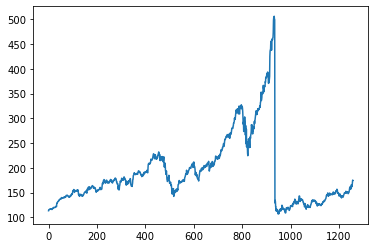

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [19]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [20]:
import numpy as np

In [21]:
df1


array([[0.01618034],
       [0.02091421],
       [0.02091421],
       ...,
       [0.16115216],
       [0.17092048],
       [0.16961803]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.01618034]
 [0.02091421]
 [0.02091421]
 ...
 [0.16115216]
 [0.17092048]
 [0.16961803]]


In [26]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size,test_size

(817, 441)

In [28]:
train_data

array([[0.01618034],
       [0.02091421],
       [0.02091421],
       [0.02249217],
       [0.02286788],
       [0.02454602],
       [0.02532248],
       [0.025598  ],
       [0.02366938],
       [0.02424546],
       [0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.074

In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 277ms/step - loss: 0.0127 - val_loss: 0.0177
Epoch 2/100
12/12 [==============================] - 2s 159ms/step - loss: 0.0031 - val_loss: 0.0219
Epoch 3/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0016 - val_loss: 0.0209
Epoch 4/100
12/12 [==============================] - 2s 155ms/step - loss: 8.6585e-04 - val_loss: 0.0188
Epoch 5/100
12/12 [==============================] - 2s 164ms/step - loss: 7.0287e-04 - val_loss: 0.0196
Epoch 6/100
12/12 [==============================] - 2s 156ms/step - loss: 6.4705e-04 - val_loss: 0.0192
Epoch 7/100
12/12 [==============================] - 2s 155ms/step - loss: 5.9579e-04 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 2s 152ms/step - loss: 5.6982e-04 - val_loss: 0.0182
Epoch 9/100
12/12 [==============================] - 2s 151ms/step - loss: 5.7673e-04 - val_loss: 0.0178
Epoch 10/100
12/12 [==============================] - 2s 155ms/ste

12/12 [==============================] - 2s 167ms/step - loss: 2.8680e-04 - val_loss: 0.0082
Epoch 79/100
12/12 [==============================] - 2s 169ms/step - loss: 2.3314e-04 - val_loss: 0.0080
Epoch 80/100
12/12 [==============================] - 2s 164ms/step - loss: 2.3461e-04 - val_loss: 0.0081
Epoch 81/100
12/12 [==============================] - 2s 161ms/step - loss: 2.3479e-04 - val_loss: 0.0075
Epoch 82/100
12/12 [==============================] - 2s 162ms/step - loss: 2.4172e-04 - val_loss: 0.0081
Epoch 83/100
12/12 [==============================] - 2s 167ms/step - loss: 2.4601e-04 - val_loss: 0.0073
Epoch 84/100
12/12 [==============================] - 2s 166ms/step - loss: 2.4609e-04 - val_loss: 0.0076
Epoch 85/100
12/12 [==============================] - 2s 166ms/step - loss: 2.6633e-04 - val_loss: 0.0073
Epoch 86/100
12/12 [==============================] - 2s 164ms/step - loss: 2.8428e-04 - val_loss: 0.0073
Epoch 87/100
12/12 [==============================] - 2s 16

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.014099220046239785

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.07971205489659618

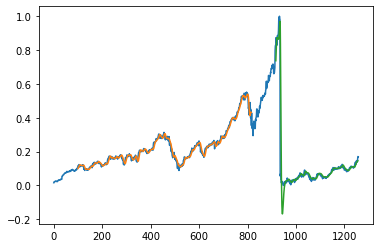

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

441

In [44]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.09658108954289293,
 0.10008766437069508,
 0.10449592986850345,
 0.10557294927989982,
 0.10001252348152787,
 0.09552911709455222,
 0.09718221665623036,
 0.09773324984345652,
 0.09688165309956168,
 0.10149029430181591,
 0.10046336881653098,
 0.100738885410144,
 0.09843456480901688,
 0.09830932999373823,
 0.09708202880400749,
 0.09773324984345652,
 0.10532247964934247,
 0.10584846587351279,
 0.1109079524107702,
 0.1085785848465873,
 0.09898559799624299,
 0.09983719474013772,
 0.10356919223544145,
 0.10737633061991234,
 0.10715090795241075,
 0.1039949906073889,
 0.10194113963681903,
 0.10459611772072633,
 0.11591734502191611,
 0.11268628678772699,
 0.11438948027551657,
 0.11724483406386974,
 0.11887288666249221,
 0.12485911083281151,
 0.1209016906700063,
 0.11829680651221039,
 0.10552285535378833,
 0.10697557921102066,
 0.10339386349405136,
 0.1056731371321227,
 0.10507201001878516,
 0.09823418910457107,
 0.09041953663118342,
 0.09164683782091422,
 0.09770820288040075,
 0.10016280525986

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15394549]
101
1 day input [0.10008766 0.10449593 0.10557295 0.10001252 0.09552912 0.09718222
 0.09773325 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456
 0.09830933 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795
 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091
 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0

8 day output [[0.16485177]]
9 day input [0.10149029 0.10046337 0.10073889 0.09843456 0.09830933 0.09708203
 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856
 0.09983719 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114
 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289
 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386
 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.

17 day output [[0.16600066]]
18 day input [0.11090795 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633
 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629
 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681
 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419
 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595
 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169 0.08583594
 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782 0.085335
 0.09247339 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025
 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175
 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476
 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269 0.11060739
 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877
 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.15394549 0.15783975
 0.16056509 0.16228996 

27 day output [[0.1668781]]
28 day input [0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.15394549 0.15783975 0.16056509 0.16228996 0.16332509 0.16394603
 0.16434261 0.16462573 0.16485177 0.16504544 0.16521624 0.16536756
 0.16550158 0.16562058

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1258

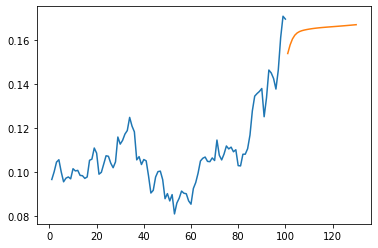

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

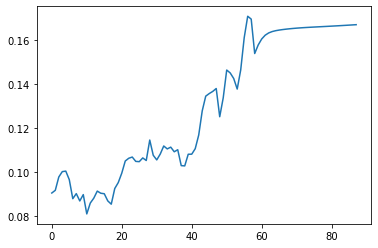

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

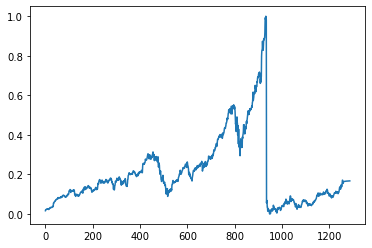

In [55]:
plt.plot(df3)